In [1]:
import scanpy as sc
import anndata as ad
import scanpy.external as sce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squidpy as sq
import scipy.sparse as sp
from scipy import sparse
from scipy.sparse import csr_matrix
import math
import torch
import torch.nn as nn
import time
import torch.nn.functional as F
from itertools import chain
from scanpy import read_10x_h5
import torch.optim as optim
import sklearn
from sklearn.neighbors import kneighbors_graph
import gudhi
import networkx as nx
from torch_geometric.nn import GCNConv
import random
import os
import json 
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pwd
os.getcwd()

'/Users/lihuazhang/Documents/stSMILE/tutorial'

In [3]:
os.chdir('/Users/lihuazhang/Documents/stSMILE')

# load data

In [4]:
section_ids = ['151674','151675']
print(section_ids)

['151674', '151675']


In [5]:
def label_to_int(adataA, label_list, label_name):
    adata_label = np.array(adataA.obs[label_name].copy())
    for i in range(len(label_list)):
        need_index = np.where(adataA.obs[label_name]==label_list[i])[0]
        if len(need_index):
            adata_label[need_index] = i
    adataA.obs['ref'] = adata_label
    return adataA

In [6]:
adata_l = []
for i in range(len(section_ids)):
    adata_i = sc.read_h5ad('/Users/lihuazhang/Documents/stSMILE/Dataset/DLPFC/DLPFC_'+ section_ids[i]+'_ST_final.h5ad')
    adata_i.obs_names = [x+'_'+section_ids[i] for x in adata_i.obs_names]
    adata_l.append(adata_i)

In [7]:
# convert label to int
label_list = ['Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5', 'Layer6', 'WM']

In [8]:
for i in range(len(section_ids)):
    adata_l[i] = label_to_int(adata_l[i], label_list, 'Ground Truth')

In [9]:
adata0_sc = sc.read_h5ad('/Users/lihuazhang/Documents/stSMILE/Dataset/DLPFC/DLPFC_sc_final.h5ad') 

In [10]:
adata0_sc

AnnData object with n_obs × n_vars = 19764 × 3010
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_type', 'cell_subtype', 'subject', 'condition', 'batch', 'n_genes', 'ref'
    var: 'features', 'n_cells', 'n_counts'
    uns: 'rank_genes_groups'
    obsm: 'X_pca'
    obsp: 'adj_f'

In [11]:
label0_list = adata0_sc.obs['cell_subtype'].tolist()
adata0_label_new = adata0_sc.obs['cell_subtype'].tolist()
for i in range(len(label0_list)):
    need_index = np.where(adata0_sc.obs['cell_subtype'] == label0_list[i])[0]    
    if len(need_index):
        for p in range(len(need_index)):
            adata0_label_new[need_index[p]] = i  

In [12]:
adata0_sc.obs['ref'] = pd.Series(adata0_label_new, index = adata0_sc.obs['cell_subtype'].index)
adata0_sc.obs['ref'] = adata0_sc.obs['ref'].astype(str)
adata0_sc.obs['ref'] = adata0_sc.obs['ref'].astype('category')
adata0_sc.obs['Ground Truth'] = adata0_sc.obs['cell_subtype']

In [13]:
adata_l.append(adata0_sc)

In [14]:
len(adata_l)

3

# Run SMILE

In [15]:
import stSMILE
from stSMILE import SMILE

In [15]:
in_features = len(adata_l[0].var.index)
hidden_features = 512
out_features = 50

In [16]:
tag_l = ['ST','ST','single cell']

In [17]:
feature_method = 'GCNConv'
alpha = 1
beta = 1
gamma = 1000
lamb = 1
theta = 0.9
spatial_regularization_strength= 0.9
lr=1e-3
subepochs=100
epochs=200
max_patience=50
min_stop=20
random_seed=2024
gpu=0
regularization_acceleration=True
edge_subset_sz=1000000

In [18]:
add_topology = True
add_feature = False
add_image = False
add_sc = True

In [19]:
multiscale = True

In [20]:
anchor_type = None
anchors_all = False
use_rep_anchor = 'embedding'
align_method = 'MMD'
anchor_size=8000

In [21]:
iter_comb= None
n_clusters_l = [7]
edge_weights = [1,0.1,0.1]

In [22]:
lr=1e-3
subepochs = 200
epochs = 400
class_rep = None
label_name='Ground Truth'
anchor_size = 5000
agg_neigh = 10
mnn_neigh=30
random_seed=1
gpu=0
regularization_acceleration=True
edge_subset_sz=1000000

In [23]:
subepochs = 20
epochs = 40

In [28]:
import math
import torch
import itertools
import random
import scipy.sparse
import anndata as ad
import numpy as np
import scanpy as sc
import pandas as pd
import torch.nn as nn
from scipy import sparse
import torch.optim as optim
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
from typing import List, Optional, Union, Any



In [30]:
from .analysis import mclust_init
from .utils import get_mean_reconstruct_sc, label_to_int, identify_anchors, mmd_rbf

ModuleNotFoundError: No module named 'analysis'

In [32]:
import numpy as np
import scanpy as sc
import anndata as ad
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [33]:
import scipy
import torch
import gudhi
import itertools
import hnswlib
import torch.linalg
import random
import copy
import scipy.sparse
import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
import networkx as nx
import torch.optim as optim

from scipy import sparse
from scipy import stats
from typing import Optional
from annoy import AnnoyIndex
from scipy.spatial import distance
from collections import Counter
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import NearestNeighbors
from scipy.optimize import linear_sum_assignment
from torch_geometric.nn import GCNConv

from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
from typing import List, Optional, Union, Any
from torch_geometric.nn.conv import MessagePassing


from torch_scatter import scatter_add
from torch_geometric.utils import add_remaining_self_loops
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
from sklearn.metrics import adjusted_rand_score as ari_score

In [34]:
def get_mean_reconstruct_sc(adata, label_list, adata_label, class_rep = None):
    index_type_l = []
    for i in range(len(label_list)):
        indexes = [index for index in range(len(adata_label)) if adata_label[index] == label_list[i]]
        index_type_l.append([indexes[j] for j in range(len(indexes))])
    if class_rep == 'reconstruct':
        sc_recon = adata.obsm['reconstruct'].copy()
    elif class_rep == 'embedding':
        sc_recon = adata.obsm['embedding'].copy()
    else:
        if scipy.sparse.issparse(adata.X):
            sc_recon = adata.X.todense() # spot*genes
        else:
            sc_recon = adata.X.copy()
    sc_recon_m_l = []
    for j in range(len(label_list)):
        sc_recon_j = sc_recon[index_type_l[j]]
        sc_recon_m_l.append(np.mean(sc_recon_j, axis = 0))
    sc_recon_m = np.array(sc_recon_m_l)
    #sc_recon_mean = pd.DataFrame(sc_recon_m.T,columns=label_list)
    return sc_recon_m

In [35]:
def label_to_int(adata, label_name):
    adata_label_o = np.array(adata.obs[label_name].copy())
    label_list = list(set(adata.obs[label_name].tolist()))
    adata_label = adata_label_o.copy()
    for i in range(len(label_list)):
        need_index = np.where(adata.obs[label_name]==label_list[i])[0]
        if len(need_index):
            adata_label[need_index] = i
    adata.obs['pre_label'] = adata_label
    return adata, label_list,adata_label_o

In [36]:
def identify_anchors(adata_l, section_ids, st_flag, iter_comb, use_rep_anchor, label_name, mnn_neigh, agg_neigh = 10):
    if use_rep_anchor == 'Agg':
        for i in range(n):
            adata_i =  adata_l[i].copy()                    
            adata_l[i].obsm['Agg'] = generate_aggegate_data(adata_i, agg_neigh = agg_neigh) 
           

    adata_l_st = []
    for st_i in st_flag:
        adata_l_st.append(adata_l[st_i])

    adata_concat_st = ad.concat(adata_l_st, label="slice_name", keys=section_ids) ## note: here will generate repeat slice names
    adata_concat_st.obs["batch_name"] = adata_concat_st.obs["slice_name"].astype('category')      

    mnns, mnns_adj = compute_mnn(adata_concat_st, adata_l_st, use_rep_anchor, iter_comb = iter_comb, batch_name='batch_name', k=mnn_neigh, metric='euclidean', method = 'approx')
    
    # for each data pair, check the accuracy
    if label_name in adata_concat_st.obs.keys():
        print(check_mnn_accuracy(mnns_adj, adata_concat_st, iter_comb, label_name, batch_name='batch_name'))
     
    anchors_l = covert_mnns(adata_concat_st, mnns_adj, iter_comb, label_name, batch_name='batch_name')    
    return anchors_l

In [37]:
def mmd_rbf(source, target, kernel, kernel_mul=2.0, kernel_num=5, fix_sigma=None):
    '''
    将源域数据和目标域数据转化为核矩阵，即上文中的K
    Params: 
    source: 源域数据（n * len(x))
    target: 目标域数据（m * len(y))
    kernel_mul: 
    kernel_num: 取不同高斯核的数量
    fix_sigma: 不同高斯核的sigma值
    Return:
    sum(kernel_val): 多个核矩阵之和
    '''
    
    #n_samples = int(source.size()[0])+int(target.size()[0])# 求矩阵的行数，一般source和target的尺度是一样的，这样便于计算
    
    
    xx, yy, zz = torch.mm(source, source.t()), torch.mm(target, target.t()), torch.mm(source, target.t())
    rx = (xx.diag().unsqueeze(0).expand_as(xx))
    ry = (yy.diag().unsqueeze(0).expand_as(yy))

    dxx = rx.t() + rx - 2. * xx # Used for A in (1)
    dyy = ry.t() + ry - 2. * yy # Used for B in (1)
    dxy = rx.t() + ry - 2. * zz # Used for C in (1)

    #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    if fix_sigma:
        bandwidth = fix_sigma
    else:
        bandwidth = compute_bandwidth(np.vstack((source.detach().numpy(), target.detach().numpy())))
    
    
    bandwidth /= kernel_mul ** (kernel_num // 2)
    bandwidth_range = [bandwidth * (kernel_mul**i) for i in range(kernel_num)]

    #XX, YY, XY = (torch.zeros(xx.shape).to(device),
    #              torch.zeros(xx.shape).to(device),
    #              torch.zeros(xx.shape).to(device))
    XX, YY, XY = (torch.zeros(xx.shape),
                  torch.zeros(xx.shape),
                  torch.zeros(xx.shape))

    if kernel == "multiscale":
        for a in bandwidth_range:
            XX += a**2 * (a**2 + dxx)**-1
            YY += a**2 * (a**2 + dyy)**-1
            XY += a**2 * (a**2 + dxy)**-1
            
        
    if kernel == "rbf":
        for a in bandwidth_range:
            XX += torch.exp(-0.5*dxx/a)
            YY += torch.exp(-0.5*dyy/a)
            XY += torch.exp(-0.5*dxy/a)
    
    loss=torch.mean(XX)+torch.mean(YY)-2*torch.mean(XY)
    return loss

In [42]:
def permutation(feature):
    # fix_seed(FLAGS.random_seed) 
    ids = np.arange(feature.shape[0])
    ids = np.random.permutation(ids)
    feature_permutated = feature[ids]
    
    return feature_permutated 

In [44]:
def sparse_mx_to_torch_edge_list(sparse_mx):
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    edge_list = torch.from_numpy(np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    return edge_list

In [48]:
def get_mlp(adata_l,tag_l,section_ids, hidden_features, out_features, theta, lr, label_name, class_rep, gamma):
    # train a classifier for sc
    ref_sc_id = []
    n = len(adata_l)
    for i in range(n):
        if tag_l[i] == 'single cell': 
            ref_sc_id.append(i)

    adata_sc = adata_l[ref_sc_id[0]].copy()
    # return the corresponding label information
    
    adata_sc, label_list, adata_sc_label = label_to_int(adata_sc, label_name)
    
    label_sc = torch.tensor(adata_sc.obs['pre_label'])
        
    label_predictor_sc = LabelPredictor_sc(hidden_features, out_features, class_features = len(set(list(label_sc.numpy()))))
    optimizer_C_sc = optim.Adam(label_predictor_sc.parameters(), lr=lr)  
    class_criterion = nn.CrossEntropyLoss() 
    print('Training classifier...')
    emb = adata_sc.obsm['embedding'].copy()
    hidden_emb = torch.tensor(emb)
    
    # average across cell types
    sc_mean = get_mean_reconstruct_sc(adata_sc, label_list, adata_sc_label,class_rep)
    sc_recon_mean = torch.FloatTensor(sc_mean)
    
    # Normalize features for consistence between ST and scRNA-seq
    #sc_recon_mean = F.normalize(sc_recon_mean, p=2, eps=1e-12, dim=1)# cell type*genes
    # add constraint on within slice and between slices
    for epoch in range(200):
        label_predictor_sc.train()
        class_logits_sc = label_predictor_sc(hidden_emb)
        loss_sc = class_criterion(class_logits_sc, label_sc.long())
        loss_reconstruct_l = []
        loss_class_st_between = []
        loss_class_st_within = []
        class_prob_sc_l = []
        for i in range(n):
            if tag_l[i] != 'single cell':
                class_logits_sc_i = label_predictor_sc(torch.tensor(adata_l[i].obsm['embedding'].copy()))
                #class_prob_sc_i = class_logits_sc_i.softmax(-1) # spot*cell type
                class_prob_sc_i = F.softmax(class_logits_sc_i,dim=1)
                print(class_prob_sc_i.shape)
                class_prob_sc_l.append(class_prob_sc_i)
                class_dists_i = torch.cdist(class_prob_sc_i,class_prob_sc_i, p=2)
                class_dists_i = torch.div(class_dists_i, torch.max(class_dists_i))
                z_dists_i = torch.cdist(torch.tensor(adata_l[i].obsm['embedding']), torch.tensor(adata_l[i].obsm['embedding']), p=2)
                z_dists_i = torch.div(z_dists_i, torch.max(z_dists_i))
                            
                n_items = class_prob_sc_i.size(dim=0) * class_prob_sc_i.size(dim=0)
                penalty_dev_i = torch.div(torch.sum(torch.mul(1.0 - z_dists_i, class_dists_i)), n_items)
                loss_class_st_within.append(penalty_dev_i)
                # reconstruction
                if class_rep == 'reconstruct':
                    st_recon_i = torch.FloatTensor(adata_l[i].obsm['reconstruct']) # spot*genes
                elif class_rep == 'embedding':
                    st_recon_i = torch.FloatTensor(adata_l[i].obsm['embedding']) # spot*out_features
                else:
                    if scipy.sparse.issparse(adata_l[i].X):
                        st_recon_i = torch.FloatTensor(adata_l[i].X.todense()) # spot*genes

                    else:
                        st_recon_i = torch.FloatTensor(adata_l[i].X) # spot*genes
                #st_recon_i = F.normalize(st_recon_i, p=2, eps=1e-12, dim=1)
                #sc_i = torch.matmul(class_prob_sc_i, torch.transpose(sc_recon_mean,0,1))# spot*genes
            
                sc_i = torch.matmul(class_prob_sc_i, sc_recon_mean)# spot*genes
                # use constrastive learning
                emb_graph = torch.from_numpy(adata_l[i].obsp['adj_t'].astype("float32"))
                #loss_recon_i1 = Noise_Cross_Entropy(sc_i, st_recon_i,emb_graph)
                
                #sc_i = F.normalize(sc_i, p=2, eps=1e-12, dim=1)
                loss_recon_i = F.mse_loss(sc_i, st_recon_i, reduction='mean')
                #loss_recon_i = loss_recon_i1 + loss_recon_i2
                #loss_recon_i = mmd_rbf(sc_i, st_recon_i, kernel = 'rbf')
                loss_reconstruct_l.append(loss_recon_i)

        loss_reg_st_within = torch.sum(torch.stack(loss_class_st_within))/n
        loss_rec = torch.sum(torch.stack(loss_reconstruct_l))/n
        
        loss_sc_all = gamma*loss_rec+loss_sc + theta*loss_reg_st_within
        optimizer_C_sc.zero_grad()
        loss_sc_all.backward()
        optimizer_C_sc.step()
          
        if epoch % 10 == 0:
            print('epoch {:>3d}: overall loss: {:6.4f},sc classifier loss: {:6.4f},representation loss: {:6.4f},within spatial regularization loss: {:6.4f}'.format(epoch, loss_sc_all,loss_sc,loss_rec,loss_reg_st_within))

    with torch.no_grad():
                                                                                                                
        acc_sc = 0
        # check the classifier accuracy                       
        preds_i = label_predictor_sc(hidden_emb)
        pred_cls_i = preds_i.data.max(1)[1]
        acc_sc += pred_cls_i.eq(label_sc.data).cpu().sum()
        print("single cell data classification: Avg Accuracy = {:2%}".format(acc_sc/len(label_sc))) 
        for i in range(n):
            if tag_l[i] != 'single cell':
                hidden_emb_i = torch.tensor(adata_l[i].obsm['embedding'].copy()) 
                preds_i = label_predictor_sc(hidden_emb_i)
                #class_prob_sc_i = preds_i.softmax(-1)
                class_prob_sc_i = F.softmax(preds_i,dim=1)
                mlp_m = pd.DataFrame(class_prob_sc_i.cpu().detach().numpy().T, index = label_list, columns = adata_l[i].obs.index) # classifier order      
                adata_l[i].obsm['deconvolution'] = class_prob_sc_i.cpu().detach().numpy()
                adata_l[i].uns['deconvolution'] = mlp_m
    return adata_l


class Attention(nn.Module):
    def __init__(self, in_size, hidden_size=16):
        super(Attention, self).__init__()

        self.project = nn.Sequential(
            nn.Linear(in_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, 1, bias=False)
        )

    def forward(self, z):
        w = self.project(z)
        beta = torch.softmax(w, dim=1)
        return (beta * z).sum(1), beta
    
    
class Discriminator_sep(nn.Module):
    def __init__(self, n_h):
        super(Discriminator_sep, self).__init__()
        self.f_k = nn.Bilinear(n_h, n_h, 1)

        for m in self.modules():
            self.weights_init(m)

    def weights_init(self, m):
        if isinstance(m, nn.Bilinear):
            torch.nn.init.xavier_uniform_(m.weight.data)
            if m.bias is not None:
                m.bias.data.fill_(0.0)

    def forward(self, c, h_pl, h_mi, s_bias1=None, s_bias2=None):
        c_x = c.expand_as(h_pl)  

        sc_1 = self.f_k(h_pl, c_x)
        sc_2 = self.f_k(h_mi, c_x)

        if s_bias1 is not None:
            sc_1 += s_bias1
        if s_bias2 is not None:
            sc_2 += s_bias2

        logits = torch.cat((sc_1, sc_2), 1)

        return logits    
    
    
class LabelPredictor_sc(nn.Module):
    def __init__(self, hidden_features, out_features, class_features):
        super(LabelPredictor_sc, self).__init__()

        self.layer = nn.Sequential(
            nn.Linear(out_features, hidden_features),
            nn.ReLU(),

            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),

            nn.Linear(hidden_features, class_features)
        )

    def forward(self, h):
        c = self.layer(h)
        return c
    
    
    
class LabelPredictor_st(nn.Module):
    def __init__(self, hidden_features, out_features, class_features):
        super(LabelPredictor_st, self).__init__()

        self.layer = nn.Sequential(
            nn.Linear(out_features, hidden_features),
            nn.ReLU(),

            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),

            nn.Linear(hidden_features, class_features),
        )

    def forward(self, h):
        c = self.layer(h)
        return c
    
    
class AvgReadout(nn.Module):
    def __init__(self):
        super(AvgReadout, self).__init__()

    def forward(self, emb, mask=None):
        vsum = torch.mm(mask, emb)
        row_sum = torch.sum(mask, 1)
        row_sum = row_sum.expand((vsum.shape[1], row_sum.shape[0])).T
        global_emb = vsum / row_sum 
          
        return F.normalize(global_emb, p=2, dim=1) 

def permutation(feature):
    # fix_seed(FLAGS.random_seed) 
    ids = np.arange(feature.shape[0])
    ids = np.random.permutation(ids)
    feature_permutated = feature[ids]
    
    return feature_permutated 


def get_weighted_graph(adj_f, adj_t, adj_i, att):
    # where there are more than two adjs
    if adj_f is not None:
        n = adj_f.shape[0]        
    if adj_t is not None:
        n = adj_t.shape[0]
    if adj_i is not None:
        n = adj_i.shape[0]
    if adj_f is not None and adj_t is not None and adj_i is None: # feature+spatial
        att1 = att[:,0,:]
        att2 = att[:,1,:]
        adj1 = torch.mm(torch.diag(att1.view(n)), adj_f)
        adj2 = torch.mm(torch.diag(att2.view(n)), adj_t)
        adj12 = adj1+adj2
        adj = (adj12+torch.transpose(adj12, dim0=0, dim1=1))/2
    if adj_f is not None and adj_t is None and adj_i is not None: # feature+image
        att1 = att[:,0,:]
        att2 = att[:,1,:]
        adj1 = torch.mm(torch.diag(att1.view(n)), adj_f)
        adj2 = torch.mm(torch.diag(att2.view(n)), adj_i)
        adj12 = adj1+adj2
        adj = (adj12+torch.transpose(adj12, dim0=0, dim1=1))/2
    
    if adj_f is None and adj_t is not None and adj_i is not None: # spatial+image
        att1 = att[:,0,:]
        att2 = att[:,1,:]
        adj1 = torch.mm(torch.diag(att1.view(n)), adj_t)
        adj2 = torch.mm(torch.diag(att2.view(n)), adj_i)
        adj12 = adj1+adj2
        adj = (adj12+torch.transpose(adj12, dim0=0, dim1=1))/2
        
    if adj_f is not None and adj_t is not None and adj_i is not None: # feature+spatial+image
        att1 = att[:,0,:]
        att2 = att[:,1,:]
        att3 = att[:,2,:]
        adj1 = torch.mm(torch.diag(att1.view(n)), adj_f)
        adj2 = torch.mm(torch.diag(att2.view(n)), adj_t)
        adj3 = torch.mm(torch.diag(att3.view(n)), adj_i)
        adj123 = adj1+adj2+adj3
        adj = (adj123+torch.transpose(adj123, dim0=0, dim1=1))/3   
    return adj
    
def sparse_mx_to_torch_edge_list(sparse_mx):
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    edge_list = torch.from_numpy(np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    return edge_list

def get_weight(adj):
    # create sparse matrix
    row_col = []
    edge_arr = []
    rows, cols = adj.nonzero()
    edge_nums = adj.getnnz() 
    for i in range(edge_nums):
        row_col.append([rows[i], cols[i]])
        edge_arr.append(adj.data[i])
    edge_index = torch.tensor(np.array(row_col), dtype=torch.long).T
    edge_weight = torch.tensor(np.array(edge_arr), dtype=torch.float)
    return edge_index, edge_weight

class GraphsEncoder(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(GraphsEncoder, self).__init__()
        self.in_features = in_features
        self.hidden_features = hidden_features
        self.out_features = out_features
        
        self.conv1 = GCNConv(in_features, hidden_features)
        self.conv2 = GCNConv(hidden_features, out_features)
        self.norm = torch.nn.BatchNorm1d(hidden_features)
        
        self.conv3 = GCNConv(out_features, hidden_features)
        self.conv4 = GCNConv(hidden_features, in_features)
                
        self.attentionf = Attention(self.out_features)
        self.disc = Discriminator_sep(self.out_features)

        self.sigm = nn.Sigmoid()
        self.read = AvgReadout()
        

    def forward(self, feat, feat_a, adj_f, adj_t, adj_i):
        # GCN on feature space to obtain Zf
        if adj_f is not None:
            # extract edge list and edge weight
            edge_index_f, edge_weight_f = get_weight(sparse.coo_matrix(adj_f.cpu().detach().numpy()))
            h1_f = self.conv1(feat, edge_index_f, edge_weight=edge_weight_f)
            h1_f = self.norm(h1_f)
            h1_f = F.relu(h1_f)
            h1_f = self.conv2(h1_f, edge_index_f, edge_weight=edge_weight_f)
        
        # GCN on spatial to obtain Zt
        if adj_t is not None:
            edge_index_t, edge_weight_t = get_weight(sparse.coo_matrix(adj_t.cpu().detach().numpy()))
            h1_t = self.conv1(feat, edge_index_t, edge_weight=edge_weight_t)
            h1_t = self.norm(h1_t)
            h1_t = F.relu(h1_t)
            h1_t = self.conv2(h1_t, edge_index_t, edge_weight=edge_weight_t)
        
            # GCN on corruption spatial to obtain Za     
            h1_a = self.conv1(feat_a, edge_index_t,edge_weight=edge_weight_t)
            h1_a = self.norm(h1_a)
            h1_a = F.relu(h1_a)
            h1_a = self.conv2(h1_a, edge_index_t, edge_weight=edge_weight_t)
        
            # build local summary vectors
            g = self.read(h1_t, adj_t) 
            g = self.sigm(g)  
            ret = self.disc(g, h1_t, h1_a)  
        else:
            ret = None
        
        
        # GCN on image space to obtain Zi
        if adj_i is not None:
            edge_index_i, edge_weight_i = get_weight(sparse.coo_matrix(adj_i.cpu().detach().numpy()))
            h1_i = self.conv1(feat, edge_index_i, edge_weight=edge_weight_i)
            h1_i = self.norm(h1_i)
            h1_i = F.relu(h1_i)
            h1_i = self.conv2(h1_i, edge_index_i, edge_weight=edge_weight_i)
                    
        
        if adj_f is not None and adj_t is None and adj_i is None: # only feature
            hiden_emb = h1_f
            att = None
            h1_t = None
            h1_i = None
            h2 = self.conv3(hiden_emb, edge_index_f, edge_weight=edge_weight_f)
            h2 = self.norm(h2)
            h2 = F.relu(h2)
            h2 = self.conv4(h2, edge_index_f, edge_weight=edge_weight_f)
            h2 = F.relu(h2)
    
        if adj_f is None and adj_t is not None and adj_i is None: # only spatial
            hiden_emb = h1_t
            att = None
            h1_f = None
            h1_i = None  
            h2 = self.conv3(hiden_emb, edge_index_t, edge_weight=edge_weight_t)
            h2 = self.norm(h2)
            h2 = F.relu(h2)
            h2 = self.conv4(h2, edge_index_t, edge_weight=edge_weight_t)
            h2 = F.relu(h2)
            
        if adj_f is None and adj_t is None and adj_i is not None: # only image
            hiden_emb = h1_i
            att = None
            h1_f = None
            h1_t = None 
            h2 = self.conv3(hiden_emb, edge_index_i, edge_weight=edge_weight_i) 
            h2 = self.norm(h2)
            h2 = F.relu(h2)
            h2 = self.conv4(h2, edge_index_i, edge_weight=edge_weight_i)
            h2 = F.relu(h2)
            
        # attention used to combine Zt or Zf or optimal zi
        if adj_f is not None and adj_t is not None and adj_i is None: # feature+spatial
            hiden_emb = torch.stack([h1_f, h1_t], dim=1)
            hiden_emb, att = self.attentionf(hiden_emb)
             # get weighted graph 
            adj_w = get_weighted_graph(adj_f, adj_t, adj_i, att)
            # extract edge list and edge weight
            edge_index, edge_weight = get_weight(sparse.coo_matrix(adj_w.cpu().detach().numpy()))
            # decoder with GCN on weighted graph
            h2 = self.conv3(hiden_emb, edge_index, edge_weight=edge_weight)
            h2 = self.norm(h2)
            h2 = F.relu(h2)
            h2 = self.conv4(h2, edge_index, edge_weight=edge_weight)
            h2 = F.relu(h2)
            h1_i = None
            
        if adj_f is not None and adj_t is None and adj_i is not None: # feature+image
            hiden_emb = torch.stack([h1_f, h1_i], dim=1)
            hiden_emb, att = self.attentionf(hiden_emb)
            # get weighted graph 
            adj_w = get_weighted_graph(adj_f, adj_t, adj_i, att)
            # extract edge list and edge weight
            edge_index, edge_weight = get_weight(sparse.coo_matrix(adj_w.cpu().detach().numpy()))
            # decoder with GCN on weighted graph
            h2 = self.conv3(hiden_emb, edge_index, edge_weight=edge_weight)
            h2 = self.norm(h2)
            h2 = F.relu(h2)
            h2 = self.conv4(h2, edge_index, edge_weight=edge_weight)
            h2 = F.relu(h2)
            h1_t = None
            
            
        if adj_f is None and adj_t is not None and adj_i is not None: # spatial+image
            hiden_emb = torch.stack([h1_t, h1_i], dim=1)
            hiden_emb, att = self.attentionf(hiden_emb) 
            # get weighted graph 
            adj_w = get_weighted_graph(adj_f, adj_t, adj_i, att)
            # extract edge list and edge weight
            edge_index, edge_weight = get_weight(sparse.coo_matrix(adj_w.cpu().detach().numpy()))
            # decoder with GCN on weighted graph
            h2 = self.conv3(hiden_emb, edge_index, edge_weight=edge_weight)
            h2 = self.norm(h2)
            h2 = F.relu(h2)
            h2 = self.conv4(h2, edge_index, edge_weight=edge_weight)
            h2 = F.relu(h2)
            h1_f = None
            
        if adj_f is not None and adj_t is not None and adj_i is not None: # feature+spatial+image
            hiden_emb = torch.stack([h1_f,h1_t, h1_i], dim=1)
            hiden_emb, att = self.attentionf(hiden_emb)
            # get weighted graph 
            adj_w = get_weighted_graph(adj_f, adj_t, adj_i, att)
            # extract edge list and edge weight
            edge_index, edge_weight = get_weight(sparse.coo_matrix(adj_w.cpu().detach().numpy()))
            # decoder with GCN on weighted graph
            h2 = self.conv3(hiden_emb, edge_index, edge_weight=edge_weight)
            h2 = self.norm(h2)
            h2 = F.relu(h2)
            h2 = self.conv4(h2, edge_index, edge_weight=edge_weight)
            h2 = F.relu(h2)
           
        return hiden_emb, att, h1_f, h1_t, h1_i, h2, ret
        


In [49]:
torch.manual_seed(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)
    
n = len(adata_l)
feat_l = []
feat_a_l = []
spatial_coords_l = []
adj_f_l = []
edge_index_f_l = []
adj_t_l = []
edge_index_t_l = []
adj_i_l = []
edge_index_i_l = []
for i in range(n):
    if scipy.sparse.issparse(adata_l[i].X): 
        feat_l.append(torch.from_numpy(adata_l[i].X.todense()).to(torch.float))
    else:
        feat_l.append(torch.from_numpy(adata_l[i].X).to(torch.float))
    feat_a_l.append(permutation(feat_l[i]))
    # spatial coords
    if add_topology and 'spatial' in adata_l[i].obsm.keys(): 
        spatial_coords_l.append(torch.tensor(adata_l[i].obsm['spatial']).float()) 
    else:
        spatial_coords_l.append(None)
    # adj_f  
    if add_feature and 'adj_f' in adata_l[i].obsp.keys(): 
        adj_f_l.append(torch.from_numpy(np.multiply(adata_l[i].obsp['adj_f'].todense().astype("float32"),edge_weights[1])))
        edge_index_f_l.append(sparse_mx_to_torch_edge_list(sparse.csr_matrix(adata_l[i].obsp['adj_f'])))

    else:
        if tag_l[i] == 'single cell' and add_feature == False:
            adj_f_l.append(torch.from_numpy(np.multiply(adata_l[i].obsp['adj_f'].todense().astype("float32"),edge_weights[1])))
            edge_index_f_l.append(sparse_mx_to_torch_edge_list(sparse.csr_matrix(adata_l[i].obsp['adj_f'])))    
        else:
            adj_f_l.append(None) 
            edge_index_f_l.append(None)
            
    # adj_t
    if add_topology and 'adj_t' in adata_l[i].obsp.keys(): 
        adj_t_l.append(torch.from_numpy(np.multiply(adata_l[i].obsp['adj_t'].astype("float32"),edge_weights[0])))
        edge_index_t_l.append(sparse_mx_to_torch_edge_list(sparse.csr_matrix(adata_l[i].obsp['adj_t'])))

    else:
        adj_t_l.append(None) 
        edge_index_t_l.append(None)        
            
                    
    # adj_i
    if add_image and 'adj_i' in adata_l[i].obsp.keys():
        if scipy.sparse.issparse(adata_l[i].obsp['adj_i']): 
            adj_i_l.append(torch.from_numpy(np.multiply(adata_l[i].obsp['adj_i'].todense().astype("float32"),edge_weights[2])))
        else:
            adj_i_l.append(torch.from_numpy(np.multiply(adata_l[i].obsp['adj_i'].astype("float32"),edge_weights[2])))
        edge_index_i_l.append(sparse_mx_to_torch_edge_list(sparse.csr_matrix(adata_l[i].obsp['adj_i'])))

    else:
        adj_i_l.append(None)
        edge_index_i_l.append(None)
    
ref_sc_id = []
ref_st_id = []
for i in range(n):
    if tag_l[i] == 'single cell':
        ref_sc_id.append(i)# usually there is one ref
    if tag_l[i] == 'ST_ref':
        ref_st_id.append(i) # refernece for spatial data

if len(ref_sc_id) > 0:
    st_flag = [j for j in range(n) if j!= ref_sc_id[0]]
else:
    st_flag = [j for j in range(n)]
            
if iter_comb is None:        
    if len(ref_sc_id) > 0:
        iter_comb_a = list(itertools.combinations(range(n), 2))
        iter_comb = []
        for comb in iter_comb_a:
            if comb[0] != ref_sc_id[0] and comb[1] != ref_sc_id[0] :
                iter_comb.append(comb)
    else:
        iter_comb = list(itertools.combinations(range(n), 2))
                                                                 
if feature_method is None or feature_method == 'GCNConv':
    feature_extractor = GraphsEncoder(in_features = in_features, hidden_features = hidden_features, out_features = out_features)
if feature_method == 'LGCN_mlp':
    feature_extractor = GraphsEncoder_LGCN_mlp(in_features = in_features, hidden_features = hidden_features, out_features = out_features)
if feature_method == 'SGCN':
    feature_extractor = GraphsEncoder_SGCN(in_features = in_features, hidden_features = hidden_features, out_features = out_features)
if feature_method == 'sparse':
    feature_extractor = GraphsEncoder_sparse(in_features = in_features, hidden_features = hidden_features, out_features = out_features)
    
optimizer_F = optim.Adam(feature_extractor.parameters(), lr=lr)

# if the label is available, train classifier for each data
label_predictor_st_l, optimizer_C_st_l = [], []
for i in range(n):
    if tag_l[i] == 'ST_ref':
        label_i = torch.tensor(adata_l[i].obs['ref'].to_numpy().astype(int))
        label_predictor_st_i = LabelPredictor_st(hidden_features, out_features, class_features = len(set(list(label_i.numpy()))))
        label_predictor_st_l.append(label_predictor_st_i)
        optimizer_C_st_l.append(optim.Adam(label_predictor_st_i.parameters(), lr=lr))
    elif tag_l[i] != 'single cell' and multiscale == True and len(n_clusters_l) > 1:
        label_predictor_st_i = LabelPredictor_st(hidden_features, out_features, class_features = n_clusters_l[i])
        label_predictor_st_l.append(label_predictor_st_i)
        optimizer_C_st_l.append(optim.Adam(label_predictor_st_i.parameters(), lr=lr))    
    else:
        label_predictor_st_l.append(None)
        optimizer_C_st_l.append(None)
        
if len(ref_sc_id) > 0 and multiscale and len(n_clusters_l) == 1:
    label_predictor_st = LabelPredictor_st(hidden_features, out_features, class_features = n_clusters_l[0])
    optimizer_C_st = optim.Adam(label_predictor_st.parameters(), lr=lr)
else:
    label_predictor_st = None
    optimizer_C_st = None
                
running_F_loss, running_D_loss, running_C_st_loss = 0.0, 0.0, 0.0    
    
    
print('Pretraining to extract embeddings of spots...')
for epoch in range(subepochs):
    feature_extractor.train()
    optimizer_F.zero_grad()      
    hidden_emb_l, h1_f_l, h1_t_l, h1_i_l, h2_l, ret_l = [], [] ,[], [], [], []
    loss_l = []
    loss_c_l = []
    loss_c_train_l = []
    for i in range(n):
        if tag_l[i] != 'single cell':            
            if feature_method == 'LGCN_mlp':
                hidden_emb, _, h1_f, h1_t, h1_i, h2, ret = feature_extractor(feat_l[i], feat_a_l[i], edge_index_f_l[i], adj_f_l[i], edge_index_t_l[i], adj_t_l[i], edge_index_i_l[i], adj_i_l[i])
        
            if feature_method is None or feature_method == 'GCNConv' or feature_method == 'SGCN' or feature_method == 'sparse':
                hidden_emb, _, h1_f, h1_t, h1_i, h2, ret = feature_extractor(feat_l[i], feat_a_l[i], adj_f_l[i], adj_t_l[i], adj_i_l[i])                                                        
                                                                   
            hidden_emb_l.append(hidden_emb)
            h1_f_l.append(h1_f)
            h1_t_l.append(h1_t)
            h1_i_l.append(h1_i)
            h2_l.append(h2)
            ret_l.append(ret)
            if h1_t is not None:
                ret_CSL = torch.from_numpy(np.concatenate([np.ones([feat_l[i].shape[0], 1]), np.zeros([feat_l[i].shape[0], 1])], axis=1))
                loss_CSL = nn.BCEWithLogitsLoss()               
                loss_sl = loss_CSL(ret, ret_CSL)
            else:
                loss_sl = 0
            
            loss_feat = F.mse_loss(feat_l[i], h2)
            loss_feat_i = loss_feat
            loss_i1 = loss_feat_i + alpha*loss_sl
            if spatial_coords_l[i] is not None:
                if regularization_acceleration:
                    nodes = feat_l[i].shape[0]
                    cell_random_subset_1, cell_random_subset_2 = torch.randint(0, nodes , (edge_subset_sz,)), torch.randint(0, nodes, (edge_subset_sz,))
                    z1, z2 = torch.index_select(h1_t_l[i], 0, cell_random_subset_1), torch.index_select(h1_t_l[i], 0, cell_random_subset_2)
                    c1, c2 = torch.index_select(spatial_coords_l[i], 0, cell_random_subset_1), torch.index_select(spatial_coords_l[i], 0, cell_random_subset_2)
                    pdist = torch.nn.PairwiseDistance(p=2)

                    z_dists = pdist(z1, z2)
                    z_dists = z_dists / torch.max(z_dists)
                    sp_dists = pdist(c1, c2)
                    sp_dists = sp_dists / torch.max(sp_dists)
                    n_items = z_dists.size(dim=0)
                    penalty_i = torch.div(torch.sum(torch.mul(1.0 - z_dists, sp_dists)), n_items)
                else:
                    z_dists = torch.cdist(h1_t_l[i],h1_t_l[i], p=2)
                    z_dists = torch.div(z_dists, torch.max(z_dists))
                    sp_dists = torch.cdist(spatial_coords_l[i], spatial_coords_l[i], p=2)
                    sp_dists = torch.div(sp_dists, torch.max(sp_dists))
                    n_items = h1_t_l[i].size(dim=0) * h1_t_l[i].size(dim=0)
                    penalty_i = torch.div(torch.sum(torch.mul(1.0 - z_dists, sp_dists)), n_items)                    
            else:
                penalty_i = 0
            loss_i = loss_i1 + spatial_regularization_strength * penalty_i
            
                
            if tag_l[0] == 'ST_ref' and label_predictor_st_l[i] is not None:
                label_predictor_i = label_predictor_st_l[i]
                optimizer_C_i = optimizer_C_st_l[i]                            
                class_criterion = nn.CrossEntropyLoss()                
                label_i = torch.tensor(adata_l[i].obs['ref'].to_numpy().astype(int))
                class_logits_i = label_predictor_i(hidden_emb.detach())
                loss_ci_train = class_criterion(class_logits_i, label_i.long())
                loss_ci_train.backward() ####
                optimizer_C_i.step()
                optimizer_C_i.zero_grad() 
                loss_ci_train = loss_ci_train.item()
                
                    # then transfer to F
                class_logits_i = label_predictor_i(hidden_emb)
                loss_ci = class_criterion(class_logits_i, label_i.long())
            else:
                loss_ci_train = 0
                loss_ci = 0

            
            loss_c_l.append(loss_ci)
            loss_c_train_l.append(loss_ci_train)
            
            loss_fi = loss_i + lamb*loss_ci            
            loss_l.append(loss_fi)
            
    # unpack loss       
    loss_F = torch.sum(torch.stack(loss_l))
    loss_F.backward()
    optimizer_F.step()
    running_F_loss = loss_F.item()
    running_C_st_loss = math.fsum(loss_c_train_l)
    if epoch % 10 == 0:
        print('epoch {:>3d}: train spatial C loss: {:6.4f}, train F loss: {:6.4f},'.format(epoch, running_C_st_loss, running_F_loss))
           
with torch.no_grad():        
    for i in range(n):
        if feature_method == 'LGCN_mlp':
            hidden_emb, att, h1_f, h1_t, h1_i, h2, ret = feature_extractor(feat_l[i], feat_a_l[i], edge_index_f_l[i], adj_f_l[i], edge_index_t_l[i], adj_t_l[i], edge_index_i_l[i], adj_i_l[i])
        
        if feature_method is None or feature_method == 'GCNConv' or feature_method == 'SGCN' or feature_method == 'sparse':
            hidden_emb, att, h1_f, h1_t, h1_i, h2, ret = feature_extractor(feat_l[i], feat_a_l[i], adj_f_l[i], adj_t_l[i], adj_i_l[i])                                                        
                                                       
        adata_l[i].obsm['embedding'] = hidden_emb.cpu().detach().numpy()
            
            
        acc_st_i = 0
        if tag_l[i] == 'ST_ref':
            # check the classifier accuracy                       
            label_predictor_i = label_predictor_st_l[i]
            preds_i = label_predictor_i(hidden_emb)
            label_i = torch.tensor(adata_l[i].obs['ref'].to_numpy().astype(int))
            #adata_l[i].obsm['pre'] = label_i
            
            pred_cls_i = preds_i.data.max(1)[1]
            acc_st_i += pred_cls_i.eq(label_i.data).cpu().sum()
            print("spatial data classification: Avg Accuracy = {:2%}".format(acc_st_i/len(label_i))) 
                
        adata_l[i].obsm['embedding'] = hidden_emb.cpu().detach().numpy()
        if att is not None:
            adata_l[i].obsm['attention'] = att.cpu().detach().numpy()
        if h1_f is not None:
            adata_l[i].obsm['hidden_feature'] = h1_f.cpu().detach().numpy()
                
        if h1_t is not None:
            adata_l[i].obsm['hidden_spatial'] = h1_t.cpu().detach().numpy()
                
        if h1_i is not None:
            adata_l[i].obsm['hidden_image'] = h1_i.cpu().detach().numpy()
                
        adata_l[i].obsm['reconstruct'] = h2.cpu().detach().numpy()       

# represent spot
print('Training classifier...')
if len(ref_sc_id) > 0 and multiscale:
    # identify clustering on the embedding of each slice
    adata_l = get_mlp(adata_l,tag_l,section_ids, hidden_features, out_features, theta, lr,label_name, class_rep,gamma)
        

    if len(n_clusters_l) > 1:
        y_pred_l = []
        for i in range(n):
            if tag_l[i] != 'single cell':
                devfeatures = adata_l[i].obsm['deconvolution']
                y_pred = mclust_init(devfeatures, n_clusters_l[i])# used as cluster constraint for each slice
                y_pred_new = [y_pred[s]-1 for s in range(len(y_pred))]
                y_pred_l.append(y_pred_new)
                adata_l[i].uns['deconvolution_pre'] = adata_l[i].uns['deconvolution'].copy()
    else:
        devfeatures = []
        for i in range(n):
            if tag_l[i] != 'single cell':
                devfeatures.append(torch.tensor(adata_l[i].obsm['deconvolution']).float())
                adata_l[i].uns['deconvolution_pre'] = adata_l[i].uns['deconvolution'].copy()
        devfeatures_all = torch.cat(devfeatures).numpy()
        y_pred = mclust_init(devfeatures_all, n_clusters_l[0])
        y_pred_new = [y_pred[s]-1 for s in range(len(y_pred))]


print('Identifying anchors...')
anchors_l = identify_anchors(adata_l, section_ids, st_flag, iter_comb, use_rep_anchor, label_name, mnn_neigh)
keys_l = list(anchors_l.keys())
print('Aligning by anchors...')
for epoch in range(subepochs, epochs): 
    feature_extractor.train() #
    optimizer_F.zero_grad()
    hidden_emb_l, h1_f_l, h1_t_l, h1_i_l, h2_l, ret_l = [], [] ,[], [], [], []
    loss_l = []
    loss_c_train_l = []
    loss_c_l = []
    for i in range(n):
        if tag_l[i] != 'single cell': 
            if feature_method == 'LGCN_mlp':
                hidden_emb, _, h1_f, h1_t, h1_i, h2, ret = feature_extractor(feat_l[i], feat_a_l[i], edge_index_f_l[i], adj_f_l[i], edge_index_t_l[i], adj_t_l[i], edge_index_i_l[i], adj_i_l[i])
        
            if feature_method is None or feature_method == 'GCNConv' or feature_method == 'SGCN' or feature_method == 'sparse':
                hidden_emb, _, h1_f, h1_t, h1_i, h2, ret = feature_extractor(feat_l[i], feat_a_l[i], adj_f_l[i], adj_t_l[i], adj_i_l[i])                                                        
            
            adata_l[i].obsm['embedding'] = hidden_emb.cpu().detach().numpy()
            adata_l[i].obsm['reconstruct'] = h2.cpu().detach().numpy()
            hidden_emb_l.append(hidden_emb)
            h1_f_l.append(h1_f)
            h1_t_l.append(h1_t)
            h1_i_l.append(h1_i)
            h2_l.append(h2)
            ret_l.append(ret)
            if h1_t is not None:
                ret_CSL = torch.from_numpy(np.concatenate([np.ones([feat_l[i].shape[0], 1]), np.zeros([feat_l[i].shape[0], 1])], axis=1))
                loss_CSL = nn.BCEWithLogitsLoss()               
                loss_sl = loss_CSL(ret, ret_CSL)
            else:
                loss_sl = 0
            loss_feat = F.mse_loss(feat_l[i], h2)
            loss_feat_i = loss_feat
            loss_i1 = loss_feat_i + alpha*loss_sl          
            
            if spatial_coords_l[i] is not None:
                if regularization_acceleration:
                    nodes = feat_l[i].shape[0]
                    cell_random_subset_1, cell_random_subset_2 = torch.randint(0, nodes , (edge_subset_sz,)), torch.randint(0, nodes, (edge_subset_sz,))
                    z1, z2 = torch.index_select(h1_t_l[i], 0, cell_random_subset_1), torch.index_select(h1_t_l[i], 0, cell_random_subset_2)
                    c1, c2 = torch.index_select(spatial_coords_l[i], 0, cell_random_subset_1), torch.index_select(spatial_coords_l[i], 0, cell_random_subset_2)
                    pdist = torch.nn.PairwiseDistance(p=2)

                    z_dists = pdist(z1, z2)
                    z_dists = z_dists / torch.max(z_dists)
                    sp_dists = pdist(c1, c2)
                    sp_dists = sp_dists / torch.max(sp_dists)
                    n_items = z_dists.size(dim=0)
                    penalty_i = torch.div(torch.sum(torch.mul(1.0 - z_dists, sp_dists)), n_items)
                else:
                    z_dists = torch.cdist(h1_t_l[i],h1_t_l[i], p=2)
                    z_dists = torch.div(z_dists, torch.max(z_dists))
                    sp_dists = torch.cdist(spatial_coords_l[i], spatial_coords_l[i], p=2)
                    sp_dists = torch.div(sp_dists, torch.max(sp_dists))
                    n_items = h1_t_l[i].size(dim=0) * h1_t_l[i].size(dim=0)
                    penalty_i = torch.div(torch.sum(torch.mul(1.0 - z_dists, sp_dists)), n_items)                    
            else:
                penalty_i = 0
        
            loss_i = loss_i1 + spatial_regularization_strength * penalty_i

                
            if label_predictor_st_l[i] is not None:
                label_predictor_i = label_predictor_st_l[i]
                optimizer_C_i = optimizer_C_st_l[i]                            
                class_criterion = nn.CrossEntropyLoss()
                if len(n_clusters_l) > 1:
                    label_i = torch.tensor(np.array(y_pred_l[i]).astype(int))
                else:
                    label_i = torch.tensor(adata_l[i].obs['ref'].to_numpy().astype(int))
                class_logits_i = label_predictor_i(hidden_emb.detach())
                loss_ci_train = class_criterion(class_logits_i, label_i.long())
                loss_ci_train.backward() ####
                optimizer_C_i.step()
                optimizer_C_i.zero_grad() 
                loss_ci_train = loss_ci_train.item()
                    
                # then transfer to F
                class_logits_i = label_predictor_i(hidden_emb)
                loss_ci = class_criterion(class_logits_i, label_i.long())

                label_predictor_st_l[i] = label_predictor_i
            else:
                loss_ci_train = 0
                loss_ci = 0

                
            loss_c_l.append(loss_ci)
            loss_c_train_l.append(loss_ci_train)
            loss_fi = loss_i + lamb*loss_ci
            loss_l.append(loss_fi)
                
    running_C_st_loss = math.fsum(loss_c_train_l)
    # unpack loss       
    loss_F = torch.sum(torch.stack(loss_l))
        
    # classifier based on deconvolution
    if label_predictor_st is not None:
        emb_all = torch.cat(hidden_emb_l)
        class_criterion = nn.CrossEntropyLoss()                
        label_st = torch.tensor(np.array(y_pred_new).astype(int))
        class_logits_st = label_predictor_st(emb_all.detach())
        loss_c_st_train = class_criterion(class_logits_st, label_st.long())
        loss_c_st_train.backward() ####
        optimizer_C_st.step()
        optimizer_C_st.zero_grad() 
        running_C_st_loss = loss_c_st_train.item()
        # then transfer to F
        class_logits_st = label_predictor_st(emb_all)
        loss_c_st = class_criterion(class_logits_st, label_st.long())
        loss_F = loss_F + lamb*loss_c_st
            
    # do alignment， MMD or Discrimintor+ anchors mixture for each pair
    loss_align_D = []
    for t in range(0, len(iter_comb)):
        comb = iter_comb[t]
        i = comb[0]
        j = comb[1] 
        # take out the corresponding embeddings of the pair
        emb_source_t = adata_l[i].obsm['embedding']
        s_id_anchor = anchors_l[keys_l[t]][0]
        t_id_anchor = anchors_l[keys_l[t]][1]
            
        if anchor_size is None or anchor_size >= len(s_id_anchor):
            anchor_len = len(s_id_anchor)
            if anchor_len > 10:
                # take out the anchors
                s_id = s_id_anchor
                t_id = t_id_anchor
                t_id_o = [t_id[p]- emb_source_t.shape[0] for p in range(len(t_id))]                        
                loss_mmd_t = mmd_rbf(hidden_emb_l[i][s_id,:], hidden_emb_l[j][t_id_o,:], kernel = 'rbf')                       
        else:
            if anchors_all == True:
                # divided to different groups
                group_num = int(len(s_id_anchor)/anchor_size)
                if group_num > 1:
                    loss_mmd_t_g = []
                    for group in range(group_num-1):
                        # compute distance for each anchor pair. high distance has high priority
                        anchor_index = list(range(group*anchor_size,(group+1)*anchor_size))
                        # take out the anchors
                        s_id = [s_id_anchor[anchor_index[p]] for p in range(anchor_size)]
                        t_id = [t_id_anchor[anchor_index[p]] for p in range(anchor_size)]
                        t_id_o = [t_id[p]- emb_source_t.shape[0] for p in range(len(t_id))]                    
                        # MMD on feature embeddings              
                        loss_mmd_t_gi = mmd_rbf(hidden_emb_l[i][s_id,:], hidden_emb_l[j][t_id_o,:], kernel = 'rbf')
                        loss_mmd_t_g.append(loss_mmd_t_gi)
                    loss_mmd_t = torch.sum(torch.stack(loss_mmd_t_g))/group_num
                elif len(s_id_anchor) > 0:
                    # take out the anchors
                    anchor_len = len(s_id_anchor)
                    anchor_index = torch.randint(0, len(s_id_anchor), (anchor_len,))
                    s_id = [s_id_anchor[anchor_index[p]] for p in range(anchor_len)]
                    t_id = [t_id_anchor[anchor_index[p]] for p in range(anchor_len)]
                    t_id_o = [t_id[p]- emb_source_t.shape[0] for p in range(len(t_id))]    
                    loss_mmd_t = mmd_rbf(hidden_emb_l[i][s_id,:], hidden_emb_l[j][t_id_o,:], kernel = 'rbf')
                        
                        
                      
            if anchors_all == False:
                anchor_len = min([anchor_size,len(s_id_anchor)])
                anchor_index = torch.randint(0, len(s_id_anchor), (anchor_len,))
                # take out the anchors
                s_id = [s_id_anchor[anchor_index[p]] for p in range(anchor_len)]
                t_id = [t_id_anchor[anchor_index[p]] for p in range(anchor_len)]
                t_id_o = [t_id[p]- emb_source_t.shape[0] for p in range(len(t_id))]    
                loss_mmd_t = mmd_rbf(hidden_emb_l[i][s_id,:], hidden_emb_l[j][t_id_o,:], kernel = 'rbf')
                                       
        loss_align_D.append(loss_mmd_t)
                              
    loss_F_all = loss_F + beta * torch.sum(torch.stack(loss_align_D))
  
    loss_F_all.backward(retain_graph = True)
    optimizer_F.step()
    running_F_loss = loss_F.item()
    running_D_loss = torch.sum(torch.stack(loss_align_D)).detach()
    if epoch % 10 == 0:
        print('epoch {:>3d}: total loss:{:6.4f}, train F loss: {:6.4f}, train C loss: {:6.4f}, train D loss: {:6.4f}'.format(epoch, loss_F_all, running_F_loss, running_C_st_loss, running_D_loss))
flag = 0
    
with torch.no_grad():
    hidden_emb_l = []
    for i in range(n):
        feat_a_i = permutation(feat_l[i])
            
        if feature_method == 'LGCN_mlp':
            hidden_emb, att, h1_f, h1_t, h1_i, h2, _ = feature_extractor(feat_l[i], feat_a_i, edge_index_f_l[i], adj_f_l[i], edge_index_t_l[i], adj_t_l[i], edge_index_i_l[i], adj_i_l[i])
        
        if feature_method is None or feature_method == 'GCNConv' or feature_method == 'SGCN' or feature_method == 'sparse':
            hidden_emb, att, h1_f, h1_t, h1_i, h2, _ = feature_extractor(feat_l[i], feat_a_i, adj_f_l[i], adj_t_l[i], adj_i_l[i])

        hidden_emb_l.append(hidden_emb)
        adata_l[i].obsm['embedding'] = hidden_emb.cpu().detach().numpy()
        if att is not None:
            adata_l[i].obsm['attention'] = att.cpu().detach().numpy()
        if h1_f is not None:
            adata_l[i].obsm['hidden_feature'] = h1_f.cpu().detach().numpy()
                
        if h1_t is not None:
            adata_l[i].obsm['hidden_spatial'] = h1_t.cpu().detach().numpy()
                
        if h1_i is not None:
            adata_l[i].obsm['hidden_image'] = h1_i.cpu().detach().numpy()
                
        adata_l[i].obsm['reconstruct'] = h2.cpu().detach().numpy()

            
            
        if i == 0 and tag_l[0] == 'ST_ref':
            # check the classifier accuracy                       
            label_predictor_i = label_predictor_st_l[i]
            preds_i = label_predictor_i(torch.tensor(adata_l[i].obsm['embedding'].copy()))
            label_i = torch.tensor(adata_l[i].obs['ref'].to_numpy().astype(int))
            #adata_l[i].obsm['pre'] = label_i
            
            pred_cls_i = preds_i.data.max(1)[1]
            acc_st_i += pred_cls_i.eq(label_i.data).cpu().sum()
            print("spatial data classification: Avg Accuracy = {:2%}".format(acc_st_i/len(label_i)))
            flag = 1

        # predict other ST data, using the reference predictor
        if flag == 1:
            for s in range(n):
                if tag_l[s] != 'single cell':
                    pre_st_s = label_predictor_i(torch.tensor(adata_l[s].obsm['embedding'].copy()))                           
                    adata_l[s].obs['st_pre'] = pre_st_s.data.max(1)[1].numpy()

        if multiscale and tag_l[0] != 'ST_ref' and tag_l[i] != 'single cell' and len(n_clusters_l) > 1:
            label_predictor_i = label_predictor_st_l[i]
            preds_i = label_predictor_i(torch.tensor(adata_l[i].obsm['embedding'].copy()))
            pred_cls_i = preds_i.data.max(1)[1]
            adata_l[i].obs['pd_cluster'] = pred_cls_i
                #if 'ref' in adata_l[i].obs.keys():
                #    label_i = torch.tensor(adata_l[i].obs['ref'].to_numpy().astype(int))
                #    acc_st_i += pred_cls_i.eq(label_i.data).cpu().sum()
                #    print("spatial data classification: Avg Accuracy = {:2%}".format(acc_st_i/len(label_i)))
    if len(ref_sc_id) > 0 and multiscale and len(n_clusters_l) == 1 and tag_l[0] != 'ST_ref':
        emb_all = torch.cat(hidden_emb_l[0:(n-1)])
        preds_st = label_predictor_st(emb_all)
        pred_cls_st = preds_st.data.max(1)[1]
        adata_concat_st = ad.concat(adata_l[0:(n-1)], label="slice_name", keys=section_ids)
        adata_concat_st.obs['pd_cluster'] = pred_cls_st
        # divided to each slice
        for i in range(n-1):
            adata_i = adata_concat_st[adata_concat_st.obs['slice_name'] == section_ids[i]]
            adata_l[i].obs['pd_cluster'] = adata_i.obs['pd_cluster']
                #if 'ref' in adata_l[i].obs.keys():
                #    label_i = torch.tensor(adata_i.obs['ref'].to_numpy().astype(int))
                #    label_pre = torch.tensor(adata_i.obs['pd_cluster'].to_numpy().astype(int))
                #    acc_st_i = label_pre.eq(label_i.data).cpu().sum()
                #    print("spatial data classification: Avg Accuracy = {:2%}".format(acc_st_i/len(label_i)))
                
print('Updating classifier...')
    
if len(ref_sc_id) > 0 and multiscale:
        #print('Identifying anchors...')
        #anchors_l = identify_anchors(adata_l, section_ids, st_flag, iter_comb, use_rep_anchor, label_name, mnn_neigh)

    adata_l = get_mlp(adata_l,tag_l,section_ids,hidden_features, out_features, theta,lr,label_name, class_rep,gamma)   
                    

Pretraining to extract embeddings of spots...
epoch   0: train spatial C loss: 0.0000, train F loss: 40.2765,
epoch  10: train spatial C loss: 0.0000, train F loss: 31.5177,
Training classifier...
Training classifier...
torch.Size([3635, 33])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (99330x1 and 33x3635)

In [ ]:
adata_l = get_mlp(adata_l,tag_l,section_ids, hidden_features, out_features, theta, lr,label_name, class_rep,gamma)

In [50]:
ref_sc_id = []
n = len(adata_l)
for i in range(n):
    if tag_l[i] == 'single cell': 
        ref_sc_id.append(i)

adata_sc = adata_l[ref_sc_id[0]].copy()
# return the corresponding label information
    
adata_sc, label_list, adata_sc_label = label_to_int(adata_sc, label_name)
    
label_sc = torch.tensor(adata_sc.obs['pre_label'])
        
label_predictor_sc = LabelPredictor_sc(hidden_features, out_features, class_features = len(set(list(label_sc.numpy()))))
optimizer_C_sc = optim.Adam(label_predictor_sc.parameters(), lr=lr)  
class_criterion = nn.CrossEntropyLoss() 
print('Training classifier...')
emb = adata_sc.obsm['embedding'].copy()
hidden_emb = torch.tensor(emb)
    
# average across cell types
sc_mean = get_mean_reconstruct_sc(adata_sc, label_list, adata_sc_label,class_rep)
sc_recon_mean = torch.FloatTensor(sc_mean)
    
# Normalize features for consistence between ST and scRNA-seq
#sc_recon_mean = F.normalize(sc_recon_mean, p=2, eps=1e-12, dim=1)# cell type*genes
# add constraint on within slice and between slices
for epoch in range(20):
    label_predictor_sc.train()
    class_logits_sc = label_predictor_sc(hidden_emb)
    loss_sc = class_criterion(class_logits_sc, label_sc.long())
    loss_reconstruct_l = []
    loss_class_st_between = []
    loss_class_st_within = []
    class_prob_sc_l = []
    for i in range(n):
        if tag_l[i] != 'single cell':
            class_logits_sc_i = label_predictor_sc(torch.tensor(adata_l[i].obsm['embedding'].copy()))
            #class_prob_sc_i = class_logits_sc_i.softmax(-1) # spot*cell type
            class_prob_sc_i = F.softmax(class_logits_sc_i,dim=1)
            print(class_prob_sc_i.shape)
            class_prob_sc_l.append(class_prob_sc_i)
            class_dists_i = torch.cdist(class_prob_sc_i,class_prob_sc_i, p=2)
            class_dists_i = torch.div(class_dists_i, torch.max(class_dists_i))
            z_dists_i = torch.cdist(torch.tensor(adata_l[i].obsm['embedding']), torch.tensor(adata_l[i].obsm['embedding']), p=2)
            z_dists_i = torch.div(z_dists_i, torch.max(z_dists_i))
                            
            n_items = class_prob_sc_i.size(dim=0) * class_prob_sc_i.size(dim=0)
            penalty_dev_i = torch.div(torch.sum(torch.mul(1.0 - z_dists_i, class_dists_i)), n_items)
            loss_class_st_within.append(penalty_dev_i)
            # reconstruction
            if class_rep == 'reconstruct':
                st_recon_i = torch.FloatTensor(adata_l[i].obsm['reconstruct']) # spot*genes
            elif class_rep == 'embedding':
                st_recon_i = torch.FloatTensor(adata_l[i].obsm['embedding']) # spot*out_features
            else:
                if scipy.sparse.issparse(adata_l[i].X):
                    st_recon_i = torch.FloatTensor(adata_l[i].X.todense()) # spot*genes

                else:
                    st_recon_i = torch.FloatTensor(adata_l[i].X) # spot*genes
                #st_recon_i = F.normalize(st_recon_i, p=2, eps=1e-12, dim=1)
                #sc_i = torch.matmul(class_prob_sc_i, torch.transpose(sc_recon_mean,0,1))# spot*genes
            
            sc_i = torch.matmul(class_prob_sc_i, sc_recon_mean)# spot*genes
            # use constrastive learning
            emb_graph = torch.from_numpy(adata_l[i].obsp['adj_t'].astype("float32"))
                #loss_recon_i1 = Noise_Cross_Entropy(sc_i, st_recon_i,emb_graph)
                
            #sc_i = F.normalize(sc_i, p=2, eps=1e-12, dim=1)
            loss_recon_i = F.mse_loss(sc_i, st_recon_i, reduction='mean')
            #loss_recon_i = loss_recon_i1 + loss_recon_i2
            #loss_recon_i = mmd_rbf(sc_i, st_recon_i, kernel = 'rbf')
            loss_reconstruct_l.append(loss_recon_i)

    loss_reg_st_within = torch.sum(torch.stack(loss_class_st_within))/n
    loss_rec = torch.sum(torch.stack(loss_reconstruct_l))/n
        
    loss_sc_all = gamma*loss_rec+loss_sc + theta*loss_reg_st_within
    optimizer_C_sc.zero_grad()
    loss_sc_all.backward()
    optimizer_C_sc.step()
          
    if epoch % 10 == 0:
        print('epoch {:>3d}: overall loss: {:6.4f},sc classifier loss: {:6.4f},representation loss: {:6.4f},within spatial regularization loss: {:6.4f}'.format(epoch, loss_sc_all,loss_sc,loss_rec,loss_reg_st_within))

Training classifier...
torch.Size([3635, 33])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (99330x1 and 33x3635)

In [51]:
class_prob_sc_i.shape

torch.Size([3635, 33])

In [52]:
sc_recon_mean.shape

torch.Size([33, 1, 3010])

In [53]:
sc_mean.shape

(33, 1, 3010)

In [ ]:
def get_mean_reconstruct_sc(adata, label_list, adata_label, class_rep = None):
    index_type_l = []
    for i in range(len(label_list)):
        indexes = [index for index in range(len(adata_label)) if adata_label[index] == label_list[i]]
        index_type_l.append([indexes[j] for j in range(len(indexes))])
    if class_rep == 'reconstruct':
        sc_recon = adata.obsm['reconstruct'].copy()
    elif class_rep == 'embedding':
        sc_recon = adata.obsm['embedding'].copy()
    else:
        if scipy.sparse.issparse(adata.X):
            sc_recon = adata.X.todense() # spot*genes
        else:
            sc_recon = adata.X.copy()
    sc_recon_m_l = []
    for j in range(len(label_list)):
        sc_recon_j = sc_recon[index_type_l[j]]
        sc_recon_m_l.append(np.mean(sc_recon_j, axis = 0))
    sc_recon_m = np.array(sc_recon_m_l)
    #sc_recon_mean = pd.DataFrame(sc_recon_m.T,columns=label_list)
    return sc_recon_m

In [ ]:
sc_mean = get_mean_reconstruct_sc(adata_sc, label_list, adata_sc_label,class_rep)

In [54]:
index_type_l = []
for i in range(len(label_list)):
    indexes = [index for index in range(len(adata_sc_label)) if adata_sc_label[index] == label_list[i]]
    index_type_l.append([indexes[j] for j in range(len(indexes))])

In [55]:
adata_sc

AnnData object with n_obs × n_vars = 19764 × 3010
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_type', 'cell_subtype', 'subject', 'condition', 'batch', 'n_genes', 'ref', 'Ground Truth', 'pre_label'
    var: 'features', 'n_cells', 'n_counts'
    uns: 'rank_genes_groups'
    obsm: 'X_pca', 'embedding', 'hidden_feature', 'reconstruct'
    obsp: 'adj_f'

In [56]:
scipy.sparse.issparse(adata_sc.X)

True

In [57]:
sc_recon = adata_sc.X.todense()

In [58]:
sc_recon_m_l = []
for j in range(len(label_list)):
    sc_recon_j = sc_recon[index_type_l[j]]
    sc_recon_m_l.append(np.mean(sc_recon_j, axis = 0))
sc_recon_m = np.array(sc_recon_m_l)

In [59]:
sc_recon_m.shape

(33, 1, 3010)

In [60]:
sc_recon_j.shape

(221, 3010)

In [62]:
np.mean(sc_recon_j, axis = 0).shape

(1, 3010)

In [63]:
type(sc_recon_m_l)

list

In [65]:
sc_recon_j.shape[1]

3010

In [66]:
sc_recon_m1 = sc_recon_m.reshape(len(label_list),sc_recon_j.shape[1])

In [67]:
sc_recon_m1.shape

(33, 3010)

In [24]:
adata_l = SMILE(adata_l, tag_l, section_ids, multiscale,  n_clusters_l, in_features, feature_method, hidden_features, out_features, iter_comb, anchors_all, use_rep_anchor, alpha, beta, lamb, theta, gamma,edge_weights, add_topology, add_feature, add_image, add_sc, spatial_regularization_strength, lr=0.001, subepochs=100, epochs=200,mnn_neigh = 5)

Pretraining to extract embeddings of spots...
epoch   0: train spatial C loss: 0.0000, train F loss: 40.2765,
epoch  10: train spatial C loss: 0.0000, train F loss: 31.5177,
epoch  20: train spatial C loss: 0.0000, train F loss: 25.9265,
epoch  30: train spatial C loss: 0.0000, train F loss: 22.1915,
epoch  40: train spatial C loss: 0.0000, train F loss: 19.6751,
epoch  50: train spatial C loss: 0.0000, train F loss: 18.0545,
epoch  60: train spatial C loss: 0.0000, train F loss: 16.9492,
epoch  70: train spatial C loss: 0.0000, train F loss: 16.1290,
epoch  80: train spatial C loss: 0.0000, train F loss: 15.4910,
epoch  90: train spatial C loss: 0.0000, train F loss: 14.9728,
Training classifier...
Training classifier...


RuntimeError: mat1 and mat2 shapes cannot be multiplied (99330x1 and 33x3635)

In [28]:
adata_concat_st = ad.concat(adata_l[0:len(section_ids)], label="slice_name", keys=section_ids)

In [30]:
sc.tl.pca(adata_concat_st)
adata_concat_st.obsm['X_pca_old'] = adata_concat_st.obsm['X_pca'].copy()
adata_concat_st.obsm['X_pca'] = adata_concat_st.obsm['embedding'].copy()
sc.pp.neighbors(adata_concat_st)  
sc.tl.umap(adata_concat_st)

In [32]:
sc.tl.leiden(adata_concat_st, random_state=666, key_added="leiden", resolution=0.18)
len(list(set(adata_concat_st.obs['leiden'].tolist())))

7

In [34]:
from SMILE import analysis
analysis.mclust_R(adata_concat_st, num_cluster=7, used_obsm="embedding")

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


AnnData object with n_obs × n_vars = 7201 × 3010
    obs: 'in_tissue', 'array_row', 'array_col', 'Ground Truth', 'n_genes', 'image_cluster', 'dbscan_cluster_new', 'ref', 'slice_name', 'leiden', 'mclust'
    uns: 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'features', 'features_summary_scale0.5_0.5', 'features_summary_scale0.5_1', 'features_summary_scale0.5_2', 'features_summary_scale1_0.5', 'features_summary_scale1_1', 'features_summary_scale1_2', 'features_summary_scale2_0.5', 'features_summary_scale2_1', 'features_summary_scale2_2', 'spatial', 'embedding', 'hidden_spatial', 'reconstruct', 'X_pca_old', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

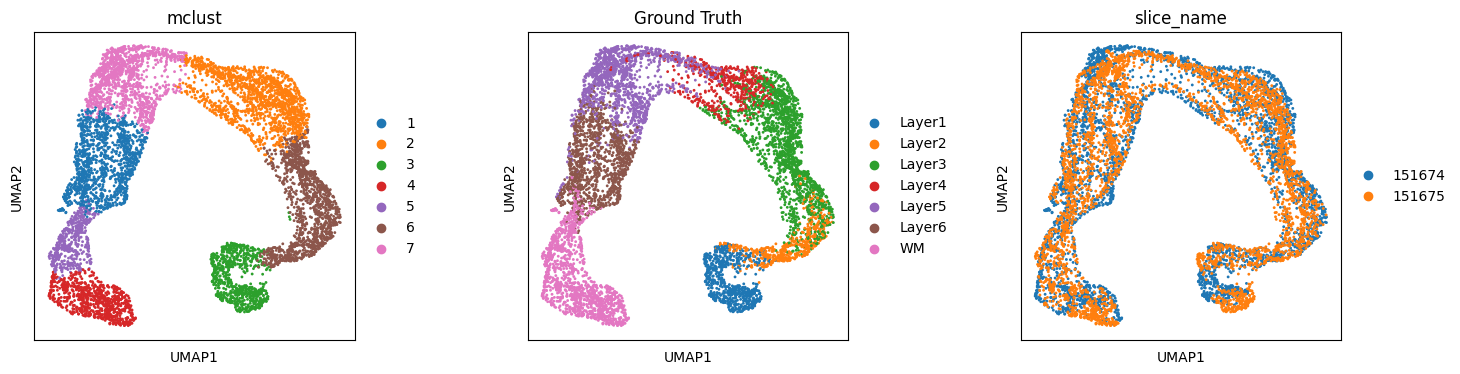

In [36]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata_concat_st,color=["mclust",'Ground Truth',"slice_name"], wspace=0.4, save = 'DLPFC_umap_cluster_SMILE.pdf')  

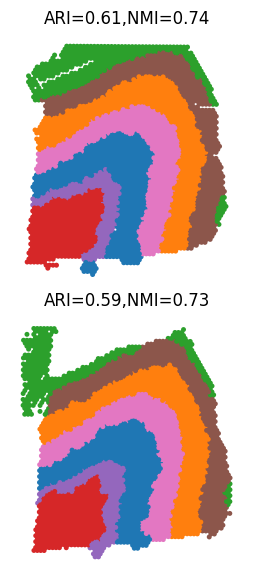

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score as ari_score
from sklearn.metrics import normalized_mutual_info_score as nmi_score
# split to each data
Batch_list = []
for section_id in section_ids:
    Batch_list.append(adata_concat_st[adata_concat_st.obs['slice_name'] == section_id])

spot_size = 200
title_size = 12
ARI_list = []
NMI_list = []
for bb in range(len(section_ids)):
    ARI_list.append(round(ari_score(Batch_list[bb].obs['Ground Truth'], Batch_list[bb].obs['mclust']), 2))
    NMI_list.append(round(nmi_score(Batch_list[bb].obs['Ground Truth'], Batch_list[bb].obs['mclust']), 2))

fig, ax = plt.subplots(2, 1, figsize=(3.5, 7), gridspec_kw={'wspace': 0.05, 'hspace': 0.1})
_sc_0 = sc.pl.spatial(Batch_list[0], img_key=None, color=['mclust'], title=[''],
                      legend_loc=None, legend_fontsize=12, show=False, ax=ax[0], frameon=False,
                      spot_size=spot_size)
_sc_0[0].set_title("ARI=" + str(ARI_list[0])+",NMI=" + str(NMI_list[0]), size=title_size)
_sc_1 = sc.pl.spatial(Batch_list[1], img_key=None, color=['mclust'], title=[''],
                      legend_loc=None, legend_fontsize=12, show=False, ax=ax[1], frameon=False,
                      spot_size=spot_size)
_sc_1[0].set_title("ARI=" + str(ARI_list[1])+",NMI=" + str(NMI_list[1]), size=title_size)
plt.savefig("DLPFC_spatial_SMILE.pdf") 
plt.show()

In [ ]:
# export the deconvoluted results of SMILE
